The goal of this exercise is to try R in jupyter and compare simple model fits.
I spent *way* too much much time trying to get plots embedded using RStudio. For now, I just want a happy, functional black box. So luckily, I've been using ipython notebook (now jupyter) and there's now R functionaliy. Time to try it out!

Anyway...
First, let's consider a logarithmic equation, $y=log(x)$
Because the y-value increases more slowly with increasing x, let's say this represents the law of diminishing returns

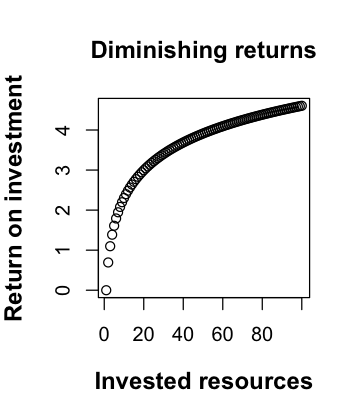

In [1]:
options(repr.plot.height=3.5 , repr.plot.width=3)
x1=1:100
y=log(x1)
plot(x1,y,main='Diminishing returns',xlab='Invested resources',ylab='Return on investment',font.lab=2,cex.lab=1.2)

Okay, so the plot looks good now! P.S., set the plot size using "options." 

Next, let's add varying amounts of noise around the theoretical value to make it look more like real-world data.

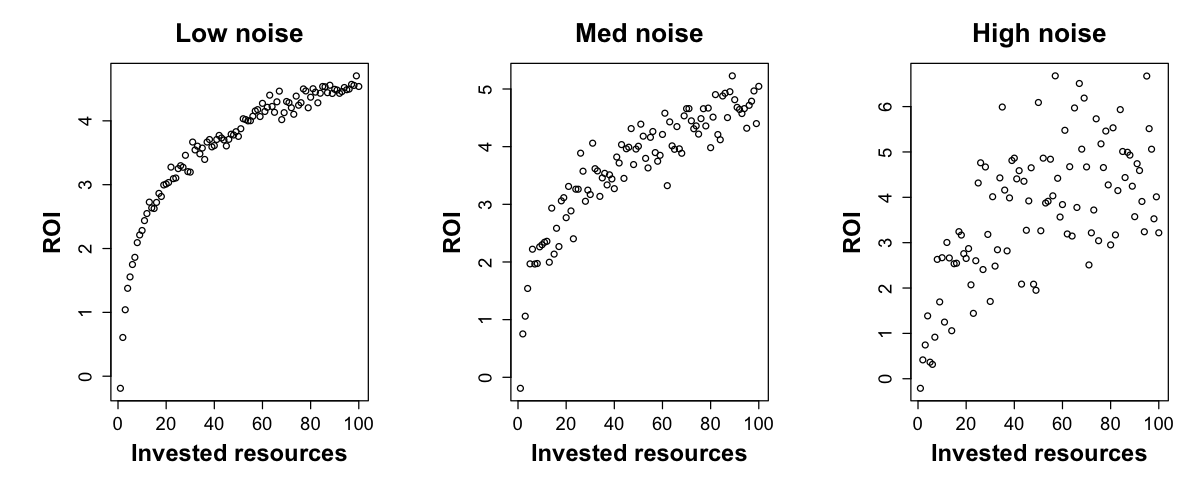

In [3]:
options(repr.plot.height=4 , repr.plot.width=10)
par(mfrow=c(1,3),font.lab=2,cex.lab=1.8,cex.main=2,cex.axis=1.4,mar = c(5,7,4,2))
y=log(x1) + rnorm(length(x1),sd=0.1)
y2=log(x1) + rnorm(length(x1),sd=0.3)
y3=log(x1) + rnorm(length(x1),sd=1)
plot(x1,y,main='Low noise',xlab='Invested resources',ylab='ROI')
plot(x1,y2,main='Med noise',xlab='Invested resources',ylab='ROI')
plot(x1,y3,main='High noise',xlab='Invested resources',ylab='ROI')


Great! Now let's try to fit the data two competing models, $$y=m*log(x)$$ which we know to be true, and a straight line, $$y=m*x$$ 

P.S., stackoverflow is really [useful](http://stackoverflow.com/questions/11569068/fitting-logarithmic-curve-to-data-points-in-r)!


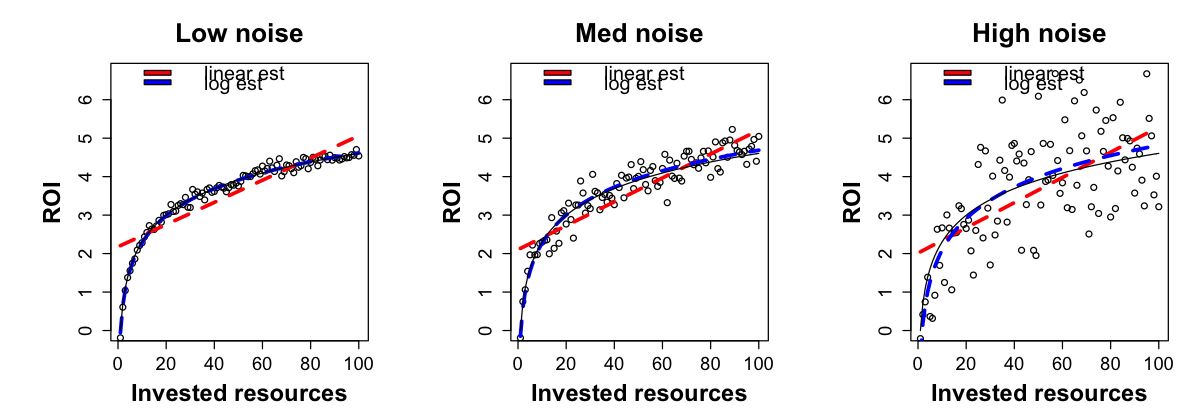

In [5]:
options(repr.plot.height=3.5 , repr.plot.width=10)
pltFits=function(yvar=y2,xvar=x1,title='Diminishing returns')
{
  ymax = max(y,y2,y3)
  plot(xvar,yvar,main=title,xlab='Invested resources',ylab='ROI',font.lab=2,ylim=c(0,ymax))
  linEst=lm(yvar~xvar)
  logEst=lm(yvar~log(xvar))
  lines(xvar,predict(linEst),lwd=3,col='red',lty=2)
  lines(xvar,predict(logEst),lwd=3,col='blue',lty=2)
  f=function(x){log(x)}
  curve(f,from=min(xvar),to=max(xvar),add=T)
  legend('topleft',c('linear est','log est'),fill=c('red','blue'),bty='n',cex=1.5,pt.cex = 1)
 }

par(mfcol=c(1,3),cex.lab=1.8,cex.main=2,cex.axis=1.4,mar = c(5,7,4,2))
pltFits(y,title='Low noise')
pltFits(y2,title='Med noise')
pltFits(y3,title='High noise')

Next we can look for systematic errors by plotting the residuals for each model fit.


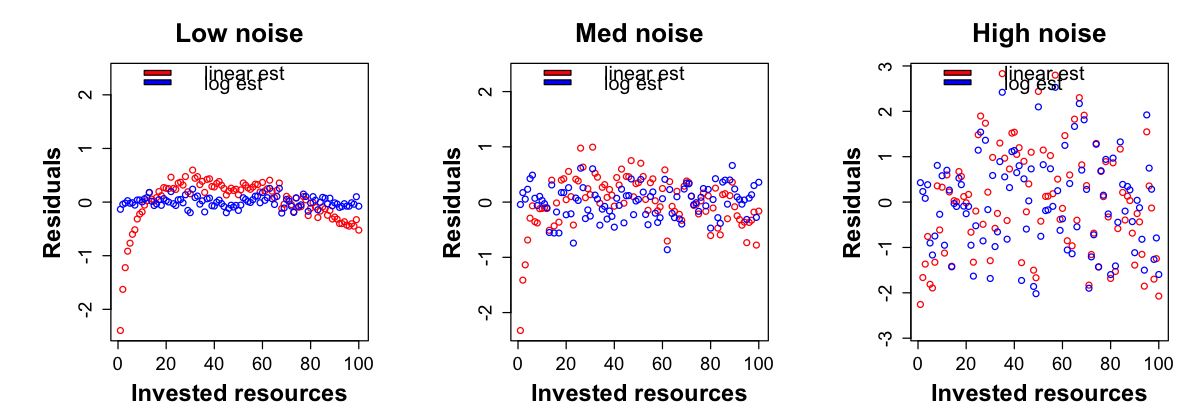

In [6]:
options(repr.plot.height=3.5 , repr.plot.width=10)
pltRes=function(yvar=y2,xvar=x1,title='Diminishing returns')
  {
  linEst=lm(yvar~xvar)
  logEst=lm(yvar~log(xvar))
  resMax = max(abs(linEst$residuals),abs(logEst$residuals))
  plot(linEst$residuals,ylim=c(-resMax,resMax),col='red',main=title,xlab='Invested resources',ylab='Residuals',font.lab=2)
  points(logEst$residuals,ylim=c(-resMax,resMax),col='blue')
  legend('topleft',c('linear est','log est'),fill=c('red','blue'),bty='n',cex=1.5,pt.cex = 1)
}
par(mfcol=c(1,3),cex.lab=1.8,cex.main=2,cex.axis= 1.4,mar = c(5,7,4,2))
pltRes(y,title='Low noise')
pltRes(y2,title='Med noise')
pltRes(y3,title='High noise')

In both the low- and medium noise, its clear by eye that the log model is superior, due to a random distribution around zero.

In the limit of high noise, its harder to tell by eye. So we can look at some summary stats.


In [7]:
logEst=summary(lm(y3~log(x1)))$r.squared
linEst=summary(lm(y3~x1))$r.squared
paste0('linear R2 = ',round(linEst,3))
paste0('log R2 = ',round(logEst,3))

[1] "linear R2 = 0.395"

[1] "log R2 = 0.528"

Looking at the r-squared values, the log fit can explain more of the variance than the linear, even when these differences are not so clear-cut by eye. 

Anyway, looks like jupyter is a more streamlined way of code display than R-studio. 